In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_linnerud
%matplotlib inline 
sns.set(style="ticks")





In [109]:
dia_dataset = load_diabetes()



In [110]:
x1_col_list = ['bp','s1','s2']

In [111]:

data1 = pd.DataFrame(dia_dataset.data,
                      columns=dia_dataset.feature_names)[x1_col_list]
data1['Y'] = dia_dataset.target
data1.head()

,bp,s1,s2,Y
0,0.021872,-0.044223,-0.034821,151.0
1,-0.026328,-0.008449,-0.019163,75.0
2,-0.005671,-0.045599,-0.034194,141.0
3,-0.036656,0.012191,0.024991,206.0
4,0.021872,0.003935,0.015596,135.0


In [112]:
X_ALL = data1.drop('Y', axis=1)

In [113]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data1['Y'])
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((331, 3), (111, 3))

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [117]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,bp,s1,s2
0,0.459840,-0.929746,-0.732065
1,-0.553511,-0.177624,-0.402886
2,-0.119218,-0.958674,-0.718897
3,-0.770658,0.256292,0.525397
4,0.459840,0.082726,0.327890
...,...,...,...
437,1.256044,-0.119769,-0.053957
438,-1.422098,1.037341,1.664355
439,0.363330,-0.785107,-0.290965
440,0.025547,0.343075,0.321306


In [118]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

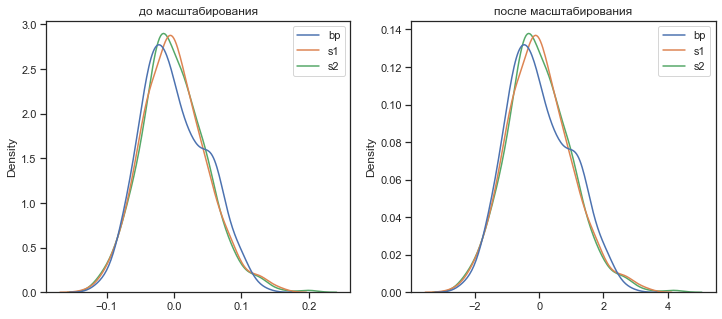

In [119]:
draw_kde(['bp','s1','s2'], data1, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [120]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

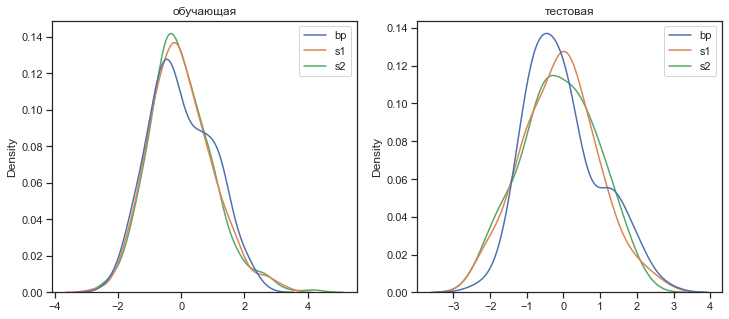

In [121]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['bp','s1','s2'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')


In [122]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [123]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,bp,s1,s2
count,442.000000,442.000000,442.000000
mean,-0.000824,-0.004481,-0.003968
std,0.200452,0.169647,0.151460
min,-0.473970,-0.456149,-0.371693
25%,-0.155129,-0.126492,-0.100528
50%,-0.024695,-0.019874,-0.016115
75%,0.149218,0.096547,0.090956
max,0.555016,0.543851,0.628307


In [124]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

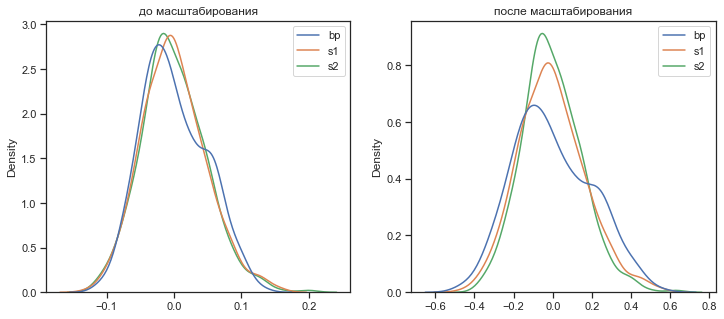

In [125]:
draw_kde(['bp','s1','s2'], data1, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

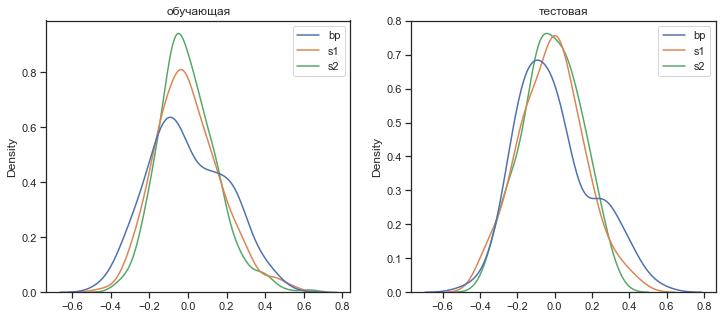

In [126]:
draw_kde(['bp','s1','s2'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

In [127]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,bp,s1,s2
count,442.000000,442.000000,442.000000
mean,0.459818,0.451668,0.367725
std,0.194806,0.169647,0.151460
min,0.000000,0.000000,0.000000
25%,0.309859,0.329657,0.271165
50%,0.436620,0.436275,0.355578
75%,0.605634,0.552696,0.462649
max,1.000000,1.000000,1.000000


In [128]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

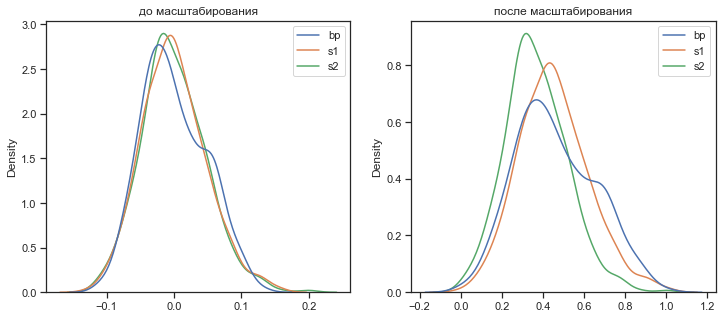

In [129]:
draw_kde(['bp','s1','s2'], data1, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

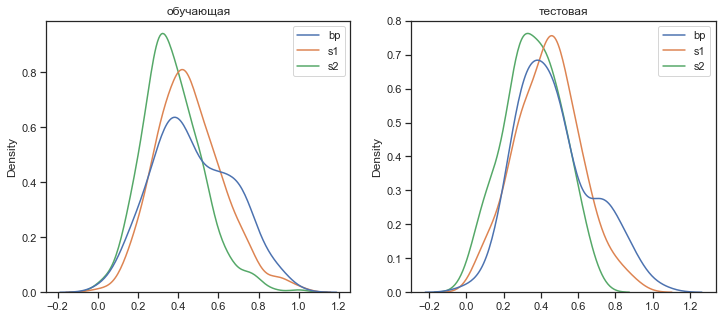

In [130]:
draw_kde(['bp','s1','s2'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

In [131]:
x_col_list = ['bp']

In [132]:

data = pd.DataFrame(dia_dataset.data,
                      columns=dia_dataset.feature_names)[x_col_list]
#data['Y'] = boston_dataset.target
data.shape

(442, 1)

In [133]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

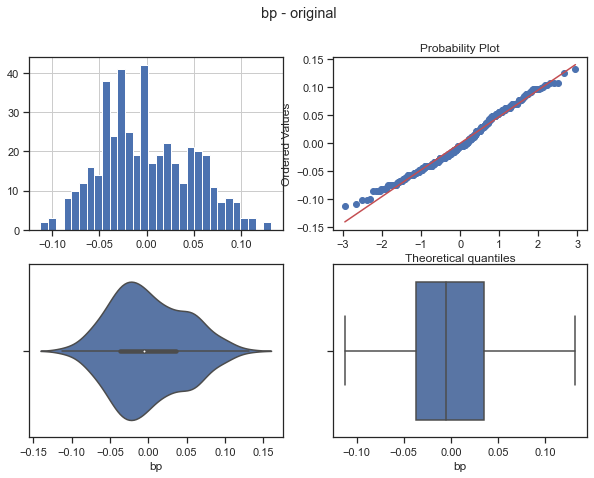

In [134]:
diagnostic_plots(data, 'bp', 'bp - original')

In [135]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [136]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary  

In [137]:
data.shape

(442, 1)

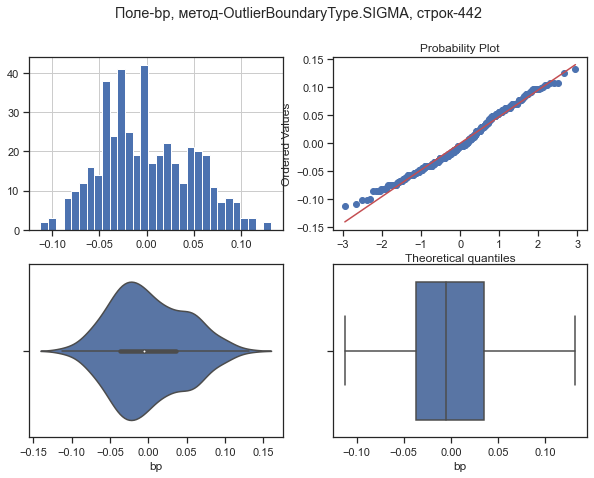

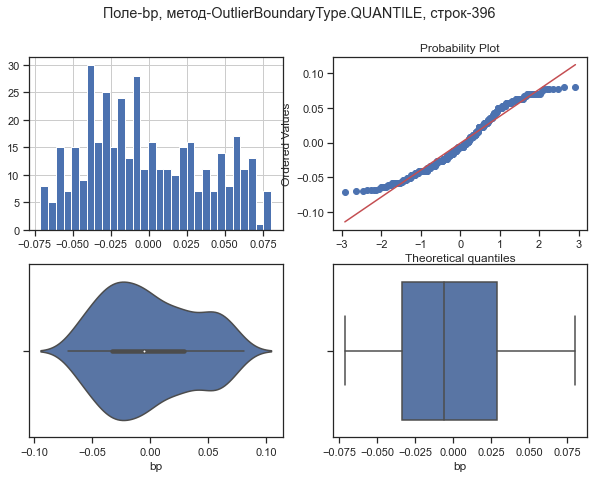

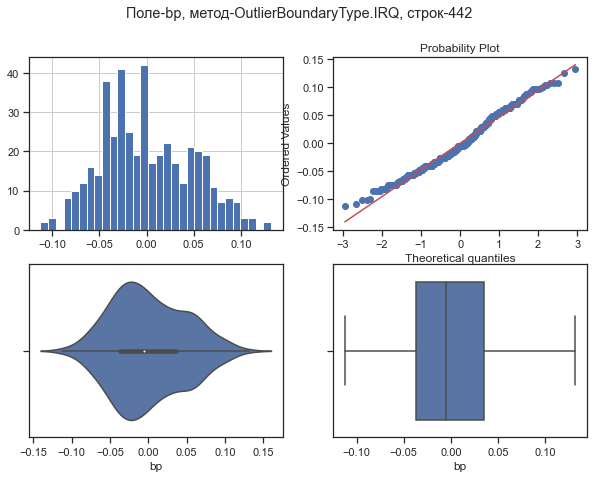

In [138]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

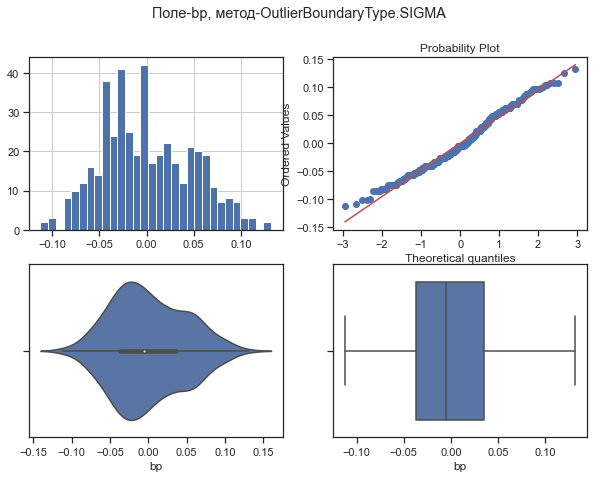

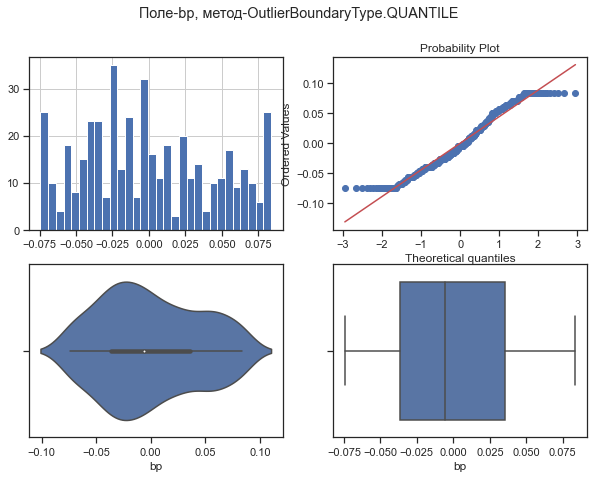

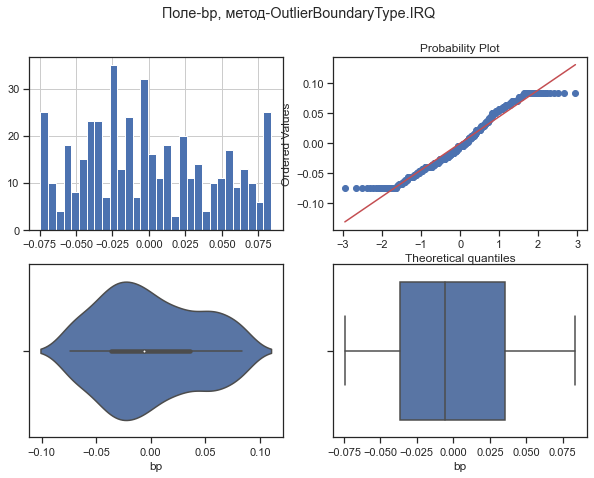

In [139]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

In [145]:
df=pd.read_csv("./covid_19_clean_complete_2022.csv")
df1=df["Country/Region"]
x_col_list3= ['Country/Region']


0                  Afghanistan
1                      Albania
2                      Algeria
3                      Andorra
4                       Angola
                  ...         
214889      West Bank and Gaza
214890    Winter Olympics 2022
214891                   Yemen
214892                  Zambia
214893                Zimbabwe
Name: Country/Region, Length: 214894, dtype: object

In [151]:
from category_encoders.count import CountEncoder as ce_CountEncoder
from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder

In [153]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(df[df.columns.difference(['Survived'])])
data_FREQ_ENC

,Active,Confirmed,Country/Region,Date,Deaths,Lat,Long,Province/State,Recovered,WHO Region
0,0,0,0.003597,0.001294,0,33.939110,67.709953,0.694245,0,0.079137
1,0,0,0.003597,0.001294,0,41.153300,20.168300,0.694245,0,0.298561
2,0,0,0.003597,0.001294,0,28.033900,1.659600,0.694245,0,0.169065
3,0,0,0.003597,0.001294,0,42.506300,1.521800,0.694245,0,0.298561
4,0,0,0.003597,0.001294,0,-11.202700,17.873900,0.694245,0,0.169065
...,...,...,...,...,...,...,...,...,...,...
214889,644414,649971,0.003597,0.001294,5557,31.952200,35.233200,0.694245,0,0.079137
214890,530,530,0.003597,0.001294,0,39.904200,116.407400,0.694245,0,0.010791
214891,9639,11774,0.003597,0.001294,2135,15.552727,48.516388,0.694245,0,0.079137
214892,309655,313613,0.003597,0.001294,3958,-13.133897,27.849332,0.694245,0,0.169065


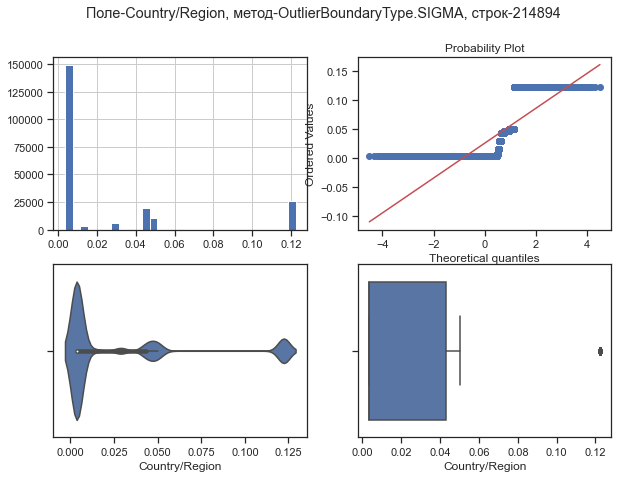

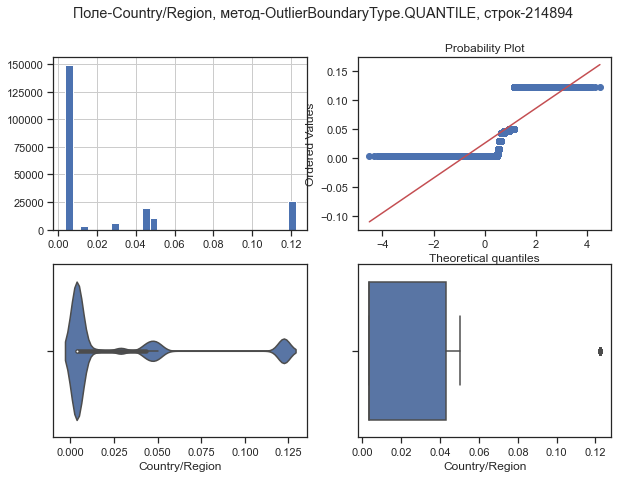

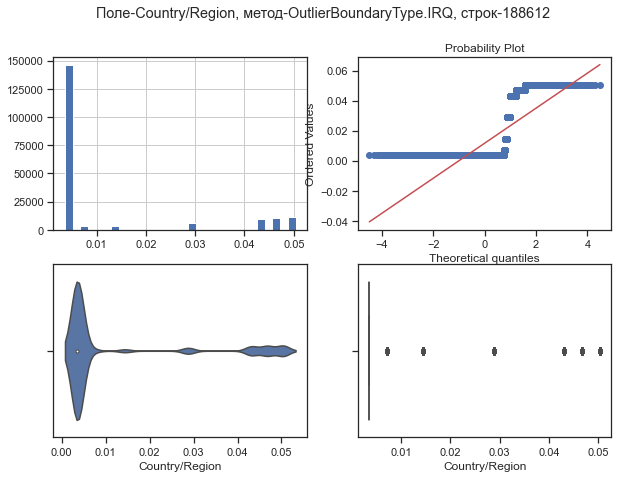

In [155]:
for col in x_col_list3:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data_FREQ_ENC, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data_FREQ_ENC[col] > upper_boundary, True, 
                                 np.where(data_FREQ_ENC[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data_FREQ_ENC.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

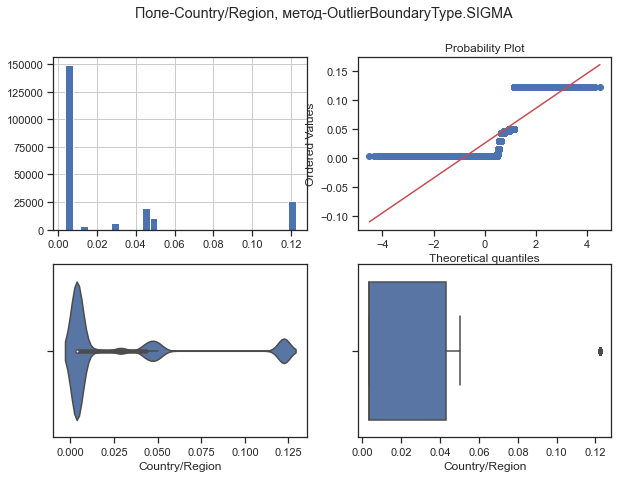

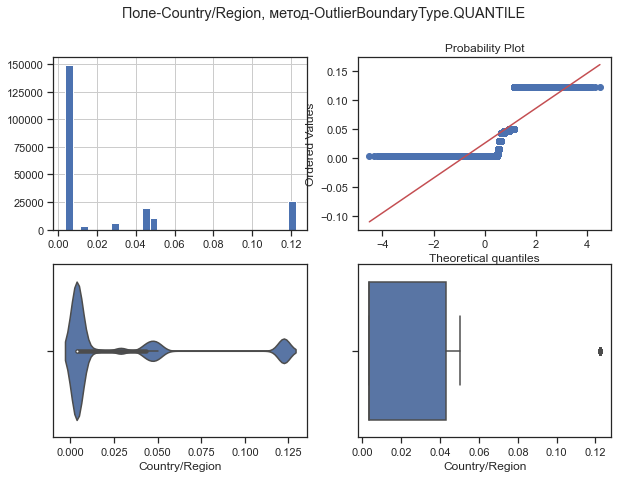

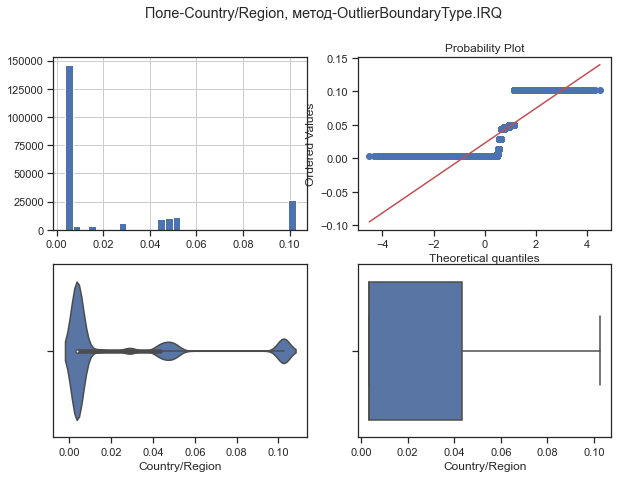

In [157]:
for col in x_col_list3:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data_FREQ_ENC, col, obt)
        # Изменение данных
        data_FREQ_ENC[col] = np.where(data_FREQ_ENC[col] > upper_boundary, upper_boundary, 
                                 np.where(data_FREQ_ENC[col] < lower_boundary, lower_boundary, data_FREQ_ENC[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data_FREQ_ENC, col, title)

In [103]:
#data = pd.DataFrame(dia_dataset.data,
                      columns=dia_dataset.feature_names)[x_col_list]
#data['Y'] = boston_dataset.target
#data.shape

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
214889,NaN,West Bank and Gaza,31.952200,35.233200,2022-03-04,649971,5557,0,644414,Eastern Mediterranean
214890,NaN,Winter Olympics 2022,39.904200,116.407400,2022-03-04,530,0,0,530,NaN
214891,NaN,Yemen,15.552727,48.516388,2022-03-04,11774,2135,0,9639,Eastern Mediterranean
214892,NaN,Zambia,-13.133897,27.849332,2022-03-04,313613,3958,0,309655,Africa


In [98]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [60]:


bre_dataset = load_diabetes()
bre_X = bre_dataset.data
bre_y = bre_dataset.target
bre_feature_names = bre_dataset['feature_names']
bre_x_df = pd.DataFrame(data=bre_dataset['data'], columns=bre_dataset['feature_names'])




Text(0, 0.5, 'Взаимная информация')

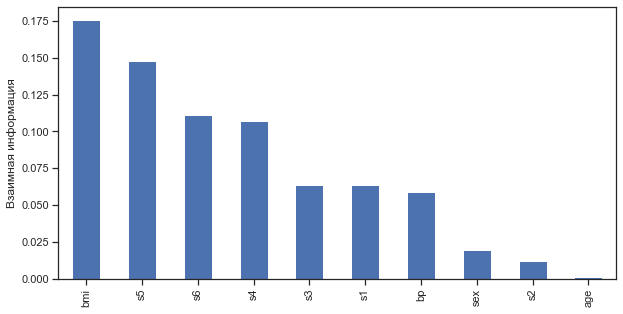

In [61]:
mi = mutual_info_regression(bre_X, bre_y)
mi = pd.Series(mi)
mi.index = bre_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [62]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(bre_X, bre_y)

list(zip(bre_feature_names, sel_mi.get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', False),
 ('s1', True),
 ('s2', False),
 ('s3', False),
 ('s4', True),
 ('s5', True),
 ('s6', True)]

In [85]:
ca_dataset = load_breast_cancer()
ca_X = ca_dataset.data
ca_y = ca_dataset.target
ca_feature_names = ca_dataset['feature_names']
ca_x_df = pd.DataFrame(data=ca_dataset['data'], columns=ca_dataset['feature_names'])

In [86]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [87]:
efs1 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(ca_X, ca_y, custom_feature_names=ca_feature_names)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 465/465

Best accuracy score: 0.95
Best subset (indices): (1, 22)
Best subset (corresponding names): ('mean texture', 'worst perimeter')


In [91]:
#efs2 = EFS(knn, 
  #         min_features=2,
    #       max_features=4,
    #       scoring='accuracy',
     #      print_progress=True,
     #      cv=5)

#efs2 = efs2.fit(bre_X, bre_y, custom_feature_names=bre_feature_names)

#print('Best accuracy score: %.2f' % efs2.best_score_)
#print('Best subset (indices):', efs2.best_idx_)
#print('Best subset (corresponding names):', efs2.best_feature_names_)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso


In [79]:
# Используем L1-регуляризацию
#e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
#e_lr1.fit(bre_X, bre_y)
# Коэффициенты регрессии
#e_lr1.coef_

In [80]:
#sel_e_lr1 = SelectFromModel(e_lr1)
#sel_e_lr1.fit(bre_X, bre_y)
#sel_e_lr1.get_support()

In [67]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(bre_X, bre_y)
# Коэффициенты регрессии
e_lr2.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
# Признак 4 исключен
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(bre_X, bre_y)
sel_e_lr2.get_support()

array([False, False, False, False, False, False, False, False, False,
       False])

In [69]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(bre_X, bre_y)
# Коэффициенты регрессии
list(zip(bre_feature_names, e_ls1.coef_))

[('age', 0.0),
 ('sex', -0.0),
 ('bmi', 367.7018520698164),
 ('bp', 6.301904186054741),
 ('s1', 0.0),
 ('s2', 0.0),
 ('s3', -0.0),
 ('s4', 0.0),
 ('s5', 307.6057000044812),
 ('s6', 0.0)]

In [70]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(bre_X, bre_y)
list(zip(bre_feature_names, sel_e_ls1.get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', True),
 ('s1', False),
 ('s2', False),
 ('s3', False),
 ('s4', False),
 ('s5', True),
 ('s6', False)]

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
dtc1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
gbc1 = GradientBoostingClassifier()
dtc1.fit(bre_X, bre_y)
rfc1.fit(bre_X, bre_y)
gbc1.fit(bre_X, bre_y)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([0.09461148, 0.0295911 , 0.13717403, 0.0973534 , 0.12000059,
        0.11025279, 0.105766  , 0.07695437, 0.09871824, 0.12957799]),
 1.0000000000000002)

In [73]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

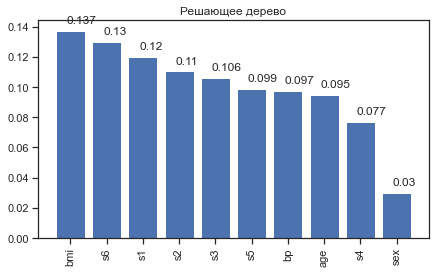

In [74]:
_,_=draw_feature_importances(dtc1, bre_x_df, 'Решающее дерево')

In [75]:
list(zip(bre_feature_names, SelectFromModel(dtc1).fit(bre_X, bre_y).get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', True),
 ('s1', False),
 ('s2', True),
 ('s3', False),
 ('s4', False),
 ('s5', True),
 ('s6', True)]

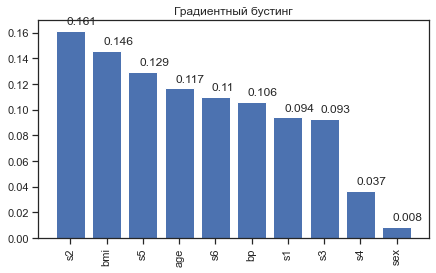

In [76]:
_,_=draw_feature_importances(gbc1, bre_x_df, 'Градиентный бустинг')

In [77]:
list(zip(bre_feature_names, SelectFromModel(gbc1).fit(bre_X, bre_y).get_support()))

[('age', True),
 ('sex', False),
 ('bmi', True),
 ('bp', True),
 ('s1', False),
 ('s2', True),
 ('s3', True),
 ('s4', False),
 ('s5', True),
 ('s6', True)]

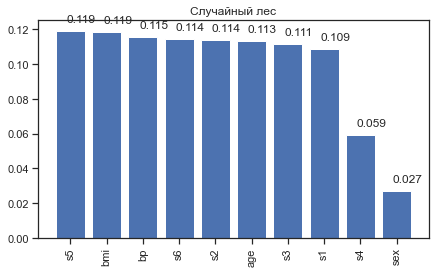

In [78]:
_,_=draw_feature_importances(rfc1, bre_x_df, 'Случайный лес')